In [1]:
"""
Created on 05/01/2023
Group 2
Authors: S.V.
License: this code is released under the CeCILL 2.1 license. See
https://www.cecill.info/licenses/Licence_CeCILL_V2.1-en.txt
"""

'\nCreated on 05/01/2023\nGroup 2\nAuthors: S.V.\nLicense: this code is released under the CeCILL 2.1 license. See\nhttps://www.cecill.info/licenses/Licence_CeCILL_V2.1-en.txt\n'

In [281]:
import os
import sys
import math
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [255]:
data = pd.read_csv("data_v6.csv")

# deleting useless variables
#data = data.drop(['target', 'distance', 'seqnum', 'loc_initiator_z', 'loc_target_z', 'protocol', 'ranging_unit', 'initiator', 'register_dump_CIR'], axis=1)
data

,target,nlos_indicator,t1,t2,t3,t4,skew,tof,tof_skew,range,...,loc_target_x,loc_target_y,loc_target_z,temperature_initiator,temperature_target,rssi_request,rssi_ack,rssi_data,rssi_mean,orientation
0,100,2.783982,946218857614,946490292658,946594234510,946322802711,-2.368804,1622,1745.608935,7.607739,...,-3.962,7.931,2.65,30.980000,30.220001,-80.136574,-80.077130,-79.836296,-80.016667,270.0
1,100,2.920485,1009474709646,1009746235572,1009850439822,1009578917162,-1.045965,1633,1687.497019,7.659333,...,-3.962,7.931,2.65,30.980000,29.840002,-80.267769,-79.988684,-79.835720,-80.030724,270.0
2,100,2.536090,1072923068046,1073194681670,1073299179662,1073027569304,-0.799856,1633,1674.791667,7.659333,...,-3.962,7.931,2.65,30.980000,29.840002,-79.964310,-79.850138,-79.693502,-79.835983,270.0
3,100,2.857669,36731534990,37003232943,37107270798,36835576116,-0.984438,1635,1686.709409,7.668714,...,-3.962,7.931,2.65,30.980000,29.840002,-80.040833,-79.818313,-79.849525,-79.902890,270.0
4,100,2.263103,99923195534,100194974620,100298828942,100027053147,-0.769092,1645,1685.436774,7.715617,...,-3.962,7.931,2.65,30.980000,29.840002,-79.999908,-80.102552,-80.022316,-80.041592,270.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3941,184,3.075243,301428484750,302000434919,302102988430,301531040251,-9.382925,995,1476.125937,4.666893,...,2.120,2.793,2.65,41.810001,46.939999,-80.229179,-79.428015,-79.342829,-79.666674,119.0
3942,184,3.085177,375355600014,375928251294,376031194254,375458544956,-8.306196,991,1418.532184,4.648132,...,2.120,2.793,2.65,41.525002,47.319996,-80.196487,-79.576395,-79.985511,-79.919464,119.0
3943,184,2.674524,449294310542,449867663034,449970544782,449397194279,-8.952233,994,1455.010695,4.662203,...,2.120,2.793,2.65,41.810001,46.939999,-80.158638,-79.435472,-79.234453,-79.609521,119.0
3944,184,2.727551,523279420046,523853474064,523955982478,523381930458,-8.490778,999,1434.188082,4.685655,...,2.120,2.793,2.65,41.240002,46.559998,-80.229492,-79.554364,-79.599858,-79.794571,119.0


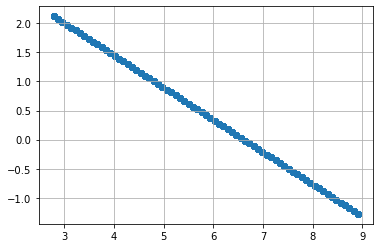

a =  -0.5548735684921144  et b =  3.6697196927161606
loc_iniatiator_y =  -0.5548735684921144  * loc_initiator_x +  3.6697196927161606


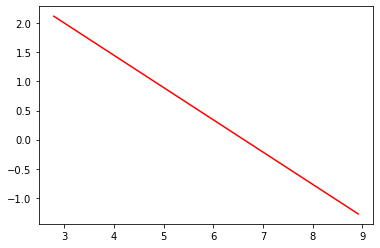

In [256]:
# Linear Regression to have x as a function of y of the form x=a*y+b
# with x : loc_initiator_y and y : loc_initiator_x
# a= -0.5548 et b= 3.6679

from scipy import stats

def predict(y):
    return slope * y + intercept

X =  data.loc_initiator_y
Y =  data.loc_initiator_x

axes = plt.axes()
axes.grid()
plt.scatter(X,Y)
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

fitLine = predict(X)
plt.plot(X, fitLine, c='r')

print("a = ", slope, " et b = ", intercept)
print("loc_iniatiator_y = ", slope, " * loc_initiator_x + ", intercept)

# Linear regression

In [257]:
# data without target 184
data_lr = data.drop(data[(data['target'] == 184)].index)   
X = data_lr.drop(['loc_initiator_y', 'loc_initiator_x'], axis=1)
y = data_lr.loc_initiator_y

# train base and test base
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2428, 21)
(810, 21)
(2428,)
(810,)


In [258]:
# model training
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
 
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [285]:
# Evaluation of the training set
from sklearn.metrics import r2_score
y_train_predict = linear_model.predict(X_train)
rmse_train = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
mae_train = mean_absolute_error(y_train, y_train_predict)
r2_train = r2_score(y_train, y_train_predict)
 
print("Model performance based on training set : ")
print("--------------------------------------")
print("The mean squared error is {}".format(rmse_train))
print("The mean absolute error  is {}".format(mae_train))
print("The R-squared is {}".format(r2_train))
print("\n")
 
# model evaluation for testing set
y_test_predict = linear_model.predict(X_test)
rmse_test = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
mae_test = mean_absolute_error(y_test, y_test_predict)
r2_test = r2_score(y_test, y_test_predict)
 
print("Model performance based on testing set : ")
print("--------------------------------------")
print("The mean squared error is {}".format(rmse_test))
print("The mean absolute error  is {}".format(mae_test))
print("The R-squared is {}".format(r2_test))


Model performance based on training set : 
--------------------------------------
The mean squared error is 1.518637609818013
The mean absolute error  is 1.2388001904374655
The R-squared is 0.25583511399856107


Model performance based on testing set : 
--------------------------------------
The mean squared error is 1.5254611614903306
The mean absolute error  is 1.240434424981892
The R-squared is 0.26479051656359776


In [260]:
a = linear_model.coef_
b = linear_model.intercept_

The MSE is approximatly equal to 1 and the R-squared approximatly 1, this means that the difference between what we predict and what we have is very small.

### Graphics

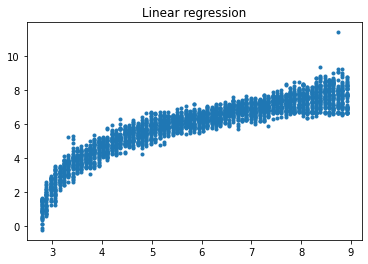

In [261]:
plt.plot(y, linear_model.predict(X),'.')
plt.title("Linear regression")
plt.show()

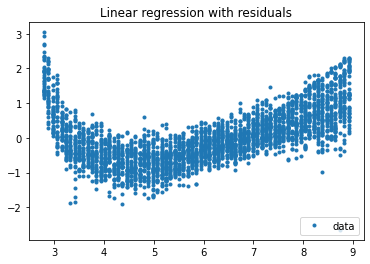

In [262]:
plt.plot(y, y-linear_model.predict(X), '.', label="data")
#plt.plot(X, a * X + b, "r-", label="regression")
plt.title("Linear regression with residuals")
plt.legend(loc="lower right")
plt.show()

## With only interesting features

In [279]:
X = data_lr[['nlos_indicator', 't1', 't2', 't3', 't4', 'skew', 'tof', 'tof_skew', 'loc_target_x', 'loc_target_y', 'rssi_request', 'rssi_ack', 'rssi_data', 'rssi_mean']]
Y = data_lr.loc_initiator_y

# train base and test base
from sklearn.model_selection import train_test_split
 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(2428, 14)
(810, 14)
(2428,)
(810,)


In [264]:
# model training
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
 
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

LinearRegression()

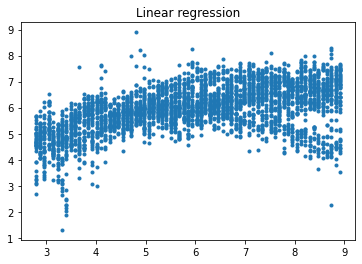

In [265]:
plt.plot(Y, linear_model.predict(X),'.')
plt.title("Linear regression")
plt.show()

In [286]:
# Evaluation of the training set
from sklearn.metrics import r2_score
Y_train_predict = linear_model.predict(X_train)
rmse_train = (np.sqrt(mean_squared_error(Y_train, Y_train_predict)))
mae_train = mean_absolute_error(y_train, y_train_predict)
r2_train = r2_score(Y_train, Y_train_predict)
 
print("Model performance based on training set : ")
print("--------------------------------------")
print("The mean squared error is {}".format(rmse_train))
print("The mean absolute error  is {}".format(mae_train))
print("The R-squared is {}".format(r2_train))
print("\n")
 
# model evaluation for testing set
Y_test_predict = linear_model.predict(X_test)
rmse_test = (np.sqrt(mean_squared_error(Y_test, Y_test_predict)))
mae_train = mean_absolute_error(y_test, y_test_predict)
r2_test = r2_score(Y_test, Y_test_predict)
 
print("Model performance based on testing set : ")
print("--------------------------------------")
print("The mean squared error is {}".format(rmse_test))
print("The mean absolute error  is {}".format(mae_test))
print("The R-squared is {}".format(r2_test))


Model performance based on training set : 
--------------------------------------
The mean squared error is 1.518637609818013
The mean absolute error  is 1.2388001904374655
The R-squared is 0.25583511399856107


Model performance based on testing set : 
--------------------------------------
The mean squared error is 1.5254611614903306
The mean absolute error  is 1.240434424981892
The R-squared is 0.26479051656359776


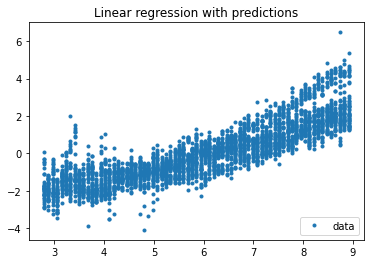

In [267]:
a = linear_model.coef_
b = linear_model.intercept_
plt.plot(Y, Y-linear_model.predict(X), '.', label="data")
#plt.plot(X, a * X + b, "r-", label="regression")
plt.title("Linear regression with predictions")
plt.legend(loc="lower right")
plt.show()

## Cross-validation

In [268]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state=5)
model = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(model,parameters, cv=None)
grid.fit(X_train, y_train)
print ("r2 / variance : ", grid.best_score_)
print("Residual sum of squares: %.2f"
              % np.mean((grid.predict(X_test) - y_test) ** 2))

r2 / variance :  0.24551239088898388
Residual sum of squares: 2.33


In [269]:
print(" Results from Grid Search ")
print("\n The best estimator across all searched params :\n", grid.best_estimator_)
print("\n The best score across all searched params :\n", grid.best_score_)
print("\n The best parameters across all searched params :\n", grid.best_params_)

 Results from Grid Search 

 The best estimator across all searched params :
 LinearRegression()

 The best score across all searched params :
 0.24551239088898388

 The best parameters across all searched params :
 {'copy_X': True, 'fit_intercept': True, 'normalize': False}


### Score

In [275]:
def score_distanceM(Xobserve,Yobserve,Xprevu,Yprevu):
    X=(Xobserve-Xprevu)**2
    Y=(Yobserve-Yprevu)**2
    return np.mean(np.sqrt(X+Y))

In [280]:
X_pred = linear_model.predict(X)
Y_pred = linear_model.predict(Y)

ValueError: Expected 2D array, got 1D array instead:
array=[2.793 2.793 2.793 ... 8.914 8.914 8.914].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## Other

In [204]:
x = X_train
y = Y_train

In [216]:
print("x :", x.shape)
print("y :", y.shape)


lr = LinearRegression()
scores = cross_val_score(lr, x, y, cv=5)
print("score", scores)
print("mean : %0.03f, standard deviation : %0.03f" % (scores.mean(), scores.std()))

prediction = cross_val_predict(lr, x , y, cv=10)
print("prediction", prediction.shape)

x : (2959, 21)
y : (2959,)
score [0.99820321 0.99323248 0.81018536 0.99814981 0.99648156]
mean : 0.959, standard deviation : 0.075
prediction (2959,)


In [217]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
#X_train = np.mat(X_train)

x = X_train
y = Y_train

print("x :", x.shape)
print("y :", y.shape)

lr = LinearRegression()
scores = cross_val_score(lr, x, y, cv=5)
print("score", scores)
print("moyenne : %0.03f, deviation : %0.03f" % (scores.mean(), scores.std()))

prediction = cross_val_predict(lr,x ,y ,  cv=10)
print("prediction", prediction.shape)

x : (2959, 21)
y : (2959,)
score [0.99820321 0.99323248 0.81018536 0.99814981 0.99648156]
moyenne : 0.959, deviation : 0.075
prediction (2959,)


In [218]:
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train,Y_train)

print('Coefficients: \n', lr.coef_)

Y_pred = lr.predict(np.mat(X_test).T)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(Y_test, Y_pred))

Coefficients: 
 [ 4.68768689e-02 -3.49225795e-03 -6.81267494e-02  6.81267435e-02
 -6.81267469e-02  6.81267528e-02 -1.56228743e+00 -1.33538767e+00
 -1.26064366e+00  2.62246928e+02  2.62221793e+02 -6.31647074e-01
  9.29493971e-01 -5.08125278e+02 -5.69790568e-01  3.04456505e-01
  5.52148795e-02 -2.93533453e-02 -2.79721719e-02 -7.03546955e-04
 -2.05743934e-02]


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 21 is different from 987)